In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy

In [81]:
samp_rate = 2e6         #hz
pulse_duration = 0.0005  #seconds
starting_freq = 100e3    #hz
ending_freq = 150e3     #hz

num_pulses = 10;
pulse_rep_period = 0.5 #seconds

In [82]:
freqs = np.linspace(starting_freq,ending_freq,int(pulse_duration*samp_rate))
t_pulse = np.linspace(0,pulse_duration,int(pulse_duration*samp_rate))

In [83]:
pulse = np.zeros(len(freqs))
for i in range(0,len(freqs)):
    pulse[i] = np.sin(2*np.pi*freqs[i]*t_pulse[i])

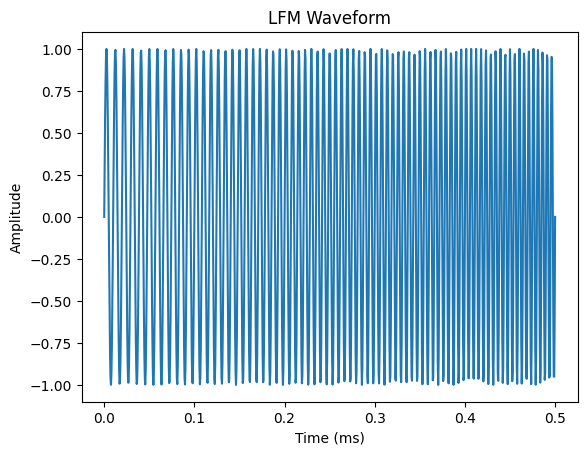

/home/sdr/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


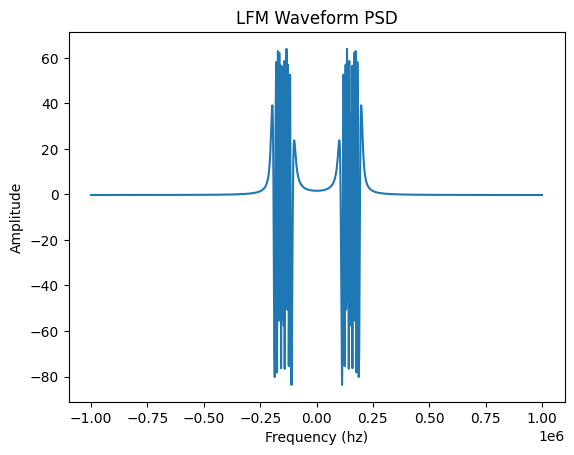

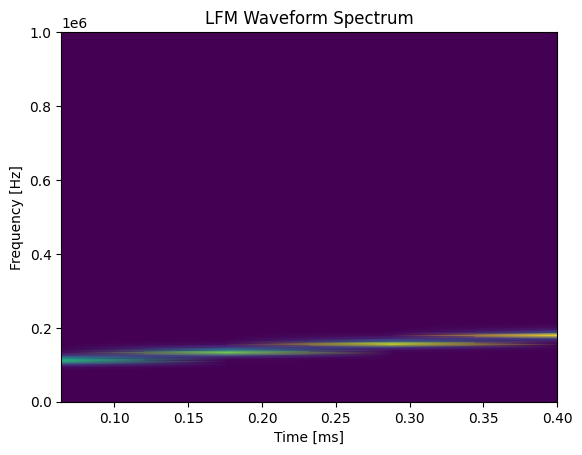

In [84]:
plt.title("LFM Waveform")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.plot(t_pulse*1000, pulse);
plt.show();

plt.title("LFM Waveform PSD")
plt.xlabel("Frequency (hz)")
plt.ylabel("Amplitude")
plt.plot(np.linspace(samp_rate/-2,samp_rate/2, len(pulse)), np.fft.fftshift(np.fft.fft(pulse)));
plt.show();

f, t, Sxx = signal.spectrogram(pulse, samp_rate)
plt.pcolormesh(t*1000, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [ms]')
plt.title("LFM Waveform Spectrum")
plt.show()

In [85]:
#pulse_train = np.concatenate([np.zeros(int(samp_rate*0.5)), pulse, np.zeros(int(samp_rate*2))])


pulse_train = np.zeros(0)
for i in range(0,num_pulses):
    pulse_train = np.concatenate([pulse_train, pulse, np.zeros(int(samp_rate*(pulse_rep_period) - len(pulse)))])

t_pulse_train = np.linspace(0,len(pulse_train)*(1/samp_rate), len(pulse_train))

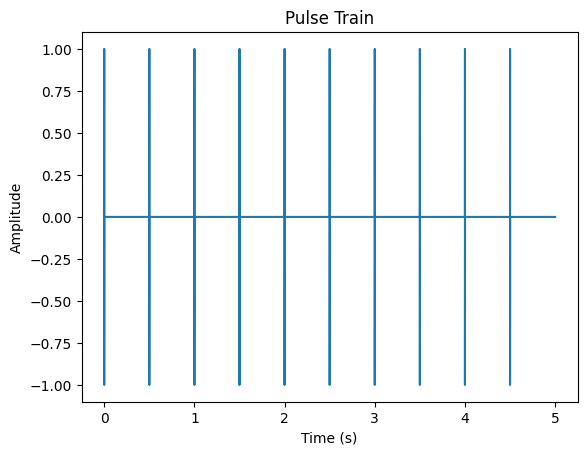

In [86]:
plt.title("Pulse Train")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, pulse_train);

In [87]:
# reflected_pulse = pulse * 0.25 #+ (np.random.rand(len(pulse)) - .5) * .4
# ret_pulse_train = pulse_train #+ (np.random.rand(len(pulse_train)) - 0.5) * 0.4
# ret_pulse_train[2000000:2004000] = reflected_pulse;

In [103]:
target_distance = 20000000 #m
#target_range_rate = 0 #m/s assume positive = away
C = scipy.constants.speed_of_light;

ret_pulse_train = np.zeros(len(pulse_train))

for i in range(0,num_pulses):
    t0 = i * pulse_rep_period
    delay =  t0 + target_distance/C
    delay_samp = int(samp_rate * delay)
    reflected_pulse = pulse * 0.25
    ret_pulse_train[delay_samp:delay_samp+len(reflected_pulse)] = reflected_pulse;
    

#reflected_pulse = pulse * 0.25 #+ (np.random.rand(len(pulse)) - .5) * .4
#ret_pulse_train = pulse_train #+ (np.random.rand(len(pulse_train)) - 0.5) * 0.4
#ret_pulse_train[2000000:2000000+len(pulse)] = reflected_pulse;

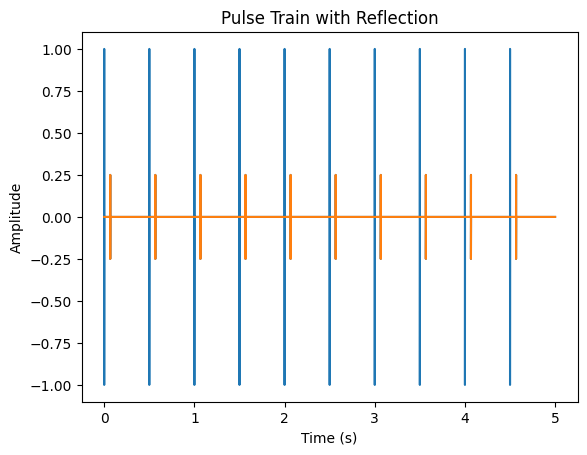

In [104]:
plt.title("Pulse Train with Reflection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_train, pulse_train);
plt.plot(t_pulse_train, ret_pulse_train);


In [105]:
pulse_compression = np.convolve(np.flip(pulse), ret_pulse_train)
t_pulse_compression = np.linspace(0,len(pulse_compression)*(1/samp_rate), len(pulse_compression))

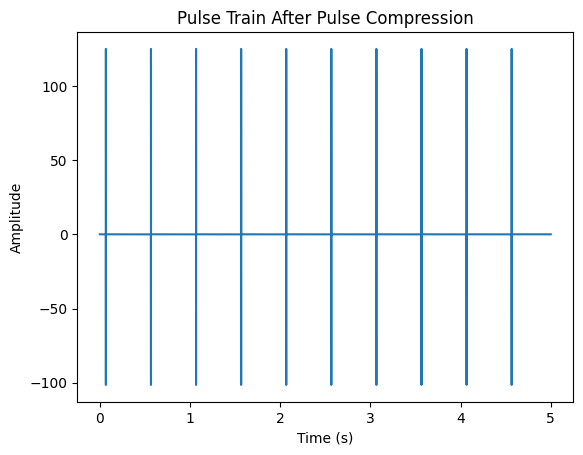

In [106]:
plt.title("Return Pulse Train After Pulse Compression")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_pulse_compression, pulse_compression);

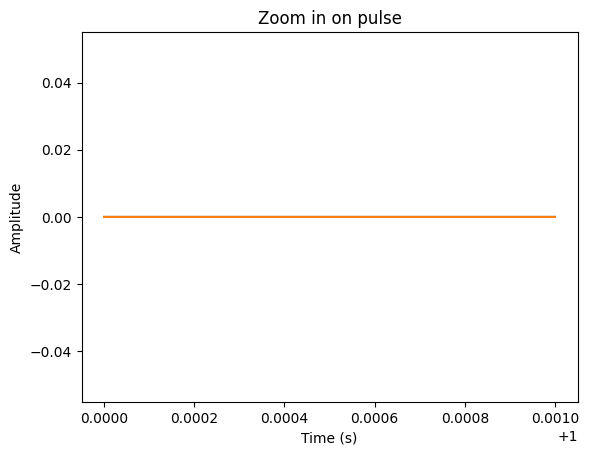

In [107]:
# plt.title("Zoom in on pulse")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.plot(t_pulse_compression[2000000:2002000], ret_pulse_train[1999500:2001500]*50);
# plt.plot(t_pulse_compression[2000000:2002000], pulse_compression[2000000:2002000]);


In [108]:
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[0:500000]))); #plt.show()
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[500000:1000000])));# plt.show()
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1000000:1500000])));# plt.show()
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[1500000:2000000]))); #plt.show()
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2000000:2500000])));# plt.show()
# plt.plot(np.fft.fftshift(np.fft.fft(pulse_compression[2500000:3000000]))); plt.show()

In [109]:
f, t, Sxx = signal.spectrogram(pulse_compression, samp_rate, nperseg=250000)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()
